## ランダムフォレスト分類器
教師あり分類問題 supervised classification problem



### Basic Libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

### Libraries for Machine Learning Algorithm

In [6]:
from sklearn import ensemble
from sklearn import  metrics
from sklearn.model_selection import train_test_split, cross_val_score

### 1. Data Preparation
XOR のデータを使用する

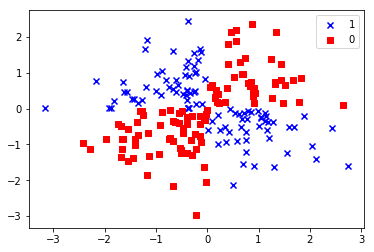

In [7]:
X = np.random.randn(200, 2) # 200個の2次元データ
y = np.logical_xor(X[:, 0] >0, X[:, 1]>0) # => True, False
y = np.where(y, 1, 0)

plt.scatter(X[y==1, 0], X[y==1, 1], c='b', marker='x', label='1')
plt.scatter(X[y==0, 0], X[y==0, 1], c='r', marker='s', label='0')
plt.legend(loc='best')
plt.show()

### 3. Preprocessing Datasets
今回は不要

### 4. Training Model
ランダムフォレスト

In [9]:
clf = ensemble.RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=2, class_weight='balanced_subsample')
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

### 5. Evaluation Data
K分割交差検証法を用いて性能評価を行う

In [10]:
scores = cross_val_score(clf, X, y, cv=10) # 分割数10
print('mean scores: %f'%scores.mean())
print('standard deviation', scores.std())

mean scores: 0.964449
standard deviation 0.04520931088773114


トレーニングデータとテストデータに分けて実行

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [14]:
y_test_pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, y_test_pred)
print('accuracy percentage: %f'%score)

accuracy percentage: 1.000000


### ensemble.RandomForestClassifier
#### parameters
- n_estimators: 決定木の数 default=10
- criterion: 剪定の基準
    - gini: ジニ不純度
    - entropy: エントロピー
- max_depth:  木の最大の深さ
- min_samples_split: 分割数
- min_samples_leaf: 分割するための最低のノード数
- min_weight_fraction_leaf: 
- max_features: 分割する際に検査する特徴量の最大数
    - \[integer\]
    - auto: sqrt(n_features)
    - sqrt: sqrt(n_features)
    - log2: log2(n_features)
    - None: n_features
- max_leaf_nodes: 
- min_impurity_decrease: 木の成長に必要な不純度の減少量のしきい値
- min_impurity_split: 木の成長を止めるための不純度のしきい値
- bootstrap: bootstrap sample を使用するか
- oob_score: out of bag 推定を行うかどうか
- n_jobs: 計算に使用するCPU数
- random_state: 乱数のシード
- verbose: ログの冗長性
- warm_start: 2回目以降のfit()で以前の木を保持したままforestを構築するか
- class_weight: クラスの重み
    - balanced: クラスの頻度を考慮した計算式
    - balanced_subsample: bootstrap sample におけるクラスの頻度を考慮

#### attributes
- estimators_: 決定木のリスト
- classes_: クラスラベルのリスト or クラスを示す配列のリスト
- n_classes_:　クラス数
- n_features_: fitが実行された時の特徴量の数
- n_outputs_: fit が実行された時の出力の数
- feature_importances_:　特徴量の重要性
- oob_score_: out-of-bag データで評価した誤り率
- oob_decision_function_:　トレーニングセットに out-of-bag 推定を使用した時の決定関数